In [87]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [88]:
df = pd.read_csv(r"E:\DataSci-ML Datasets\insurance.csv")

In [89]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [90]:
df.shape

(1338, 7)

In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [92]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


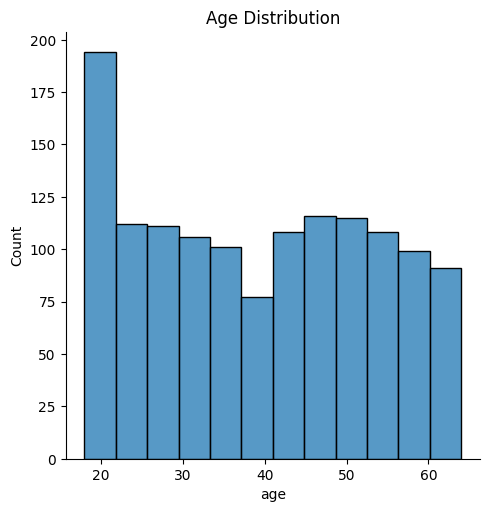

In [93]:
sns.displot(df['age'])
plt.title("Age Distribution")
plt.show()

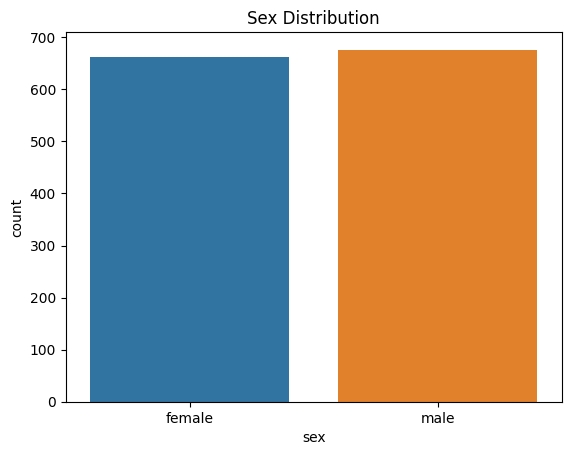

In [94]:
sns.countplot(x= 'sex' , data= df)
plt.title("Sex Distribution")
plt.show()

c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


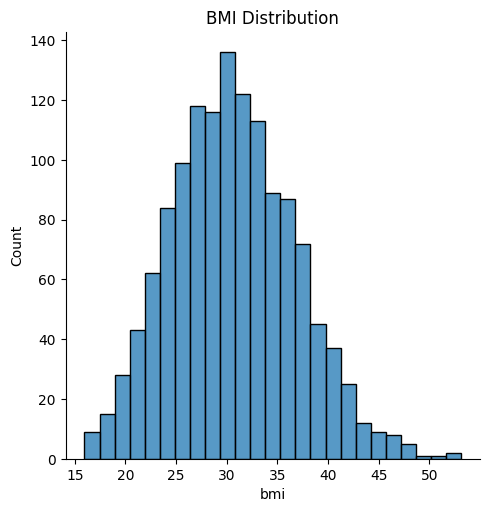

In [95]:
sns.displot(df['bmi'])
plt.title("BMI Distribution")
plt.show()

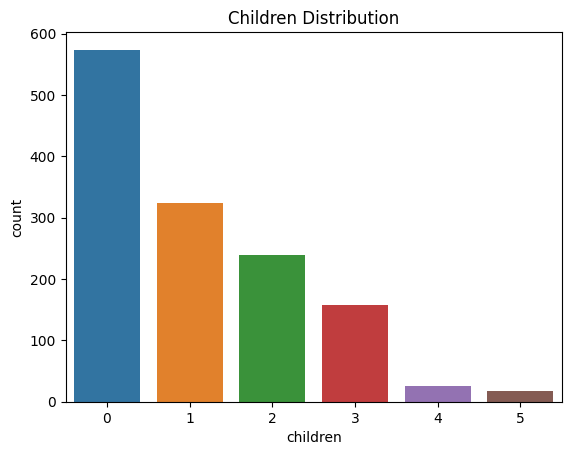

In [96]:
sns.countplot(x= 'children' , data= df)
plt.title("Children Distribution")
plt.show()

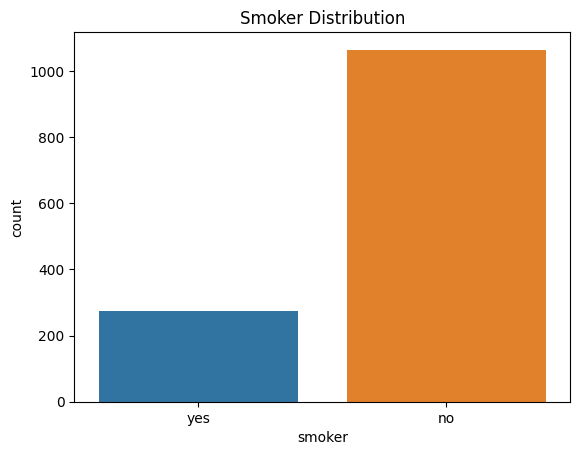

In [97]:
sns.countplot(x= 'smoker' , data= df)
plt.title("Smoker Distribution")
plt.show()

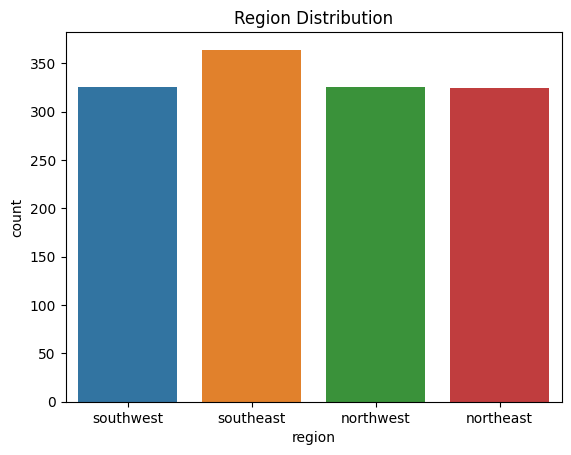

In [98]:
sns.countplot(x= 'region' , data= df)
plt.title("Region Distribution")
plt.show()

In [99]:
df['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [100]:
df.replace({'sex' : {'male' : 0 , 'female' : 1}} , inplace= True)
df.replace({'smoker' : {'yes' : 0 , 'no' : 1}} , inplace= True)
df.replace({'region' : {'southwest' : 0 , 'southeast' : 1 , 'northwest' : 2 , 'northeast' : 3}} , inplace= True)

In [101]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,0,0,16884.92400
1,18,0,33.770,1,1,1,1725.55230
2,28,0,33.000,3,1,1,4449.46200
3,33,0,22.705,0,1,2,21984.47061
4,32,0,28.880,0,1,2,3866.85520


In [102]:
X = df.drop(columns= 'charges' , axis= 1)
Y = df['charges']

In [103]:
X_train , X_test , Y_train , Y_test = train_test_split(X , Y , test_size= 0.2 , random_state= 2)

In [104]:
model = LinearRegression()
model.fit(X_train , Y_train)

LinearRegression()

In [105]:
training_prediction = model.predict(X_train)
testing_prediction = model.predict(X_test)

In [106]:
r2_training = metrics.r2_score(Y_train , training_prediction)
r2_testing = metrics.r2_score(Y_test , testing_prediction)

In [107]:
print("R2 Score of train data :" , r2_training)
print("R2 Score of test data :" , r2_testing)

R2 Score of train data : 0.7519923667088932
R2 Score of test data : 0.7445422986536502


In [ ]:
input_data = []
np_array = np.asarray(input_data)
np_reshape = np_array.reshape(1,-1)
model_prediction = model.predict(np_reshape)
print(f"Insurance cost is {model_prediction} USD.")